## The Three Body Problem
### Disclaimer
This project is lesso meant to be an exercise in a very specific field and moreso just an excuse to let me experiment with various conditions in celestial bodies when attempting to do a simulation with them. I will treat this as an experiment with explanations and hypothesises as to why each thing is happening while providing sources for claims that I believe I can back up with evidence. If there is any factually incorrect statements listed below I will quickly correct it and state the proper function or phenomena that occurs. This will be listed on my github page and will be expanded on in the future if I show any interest in returning.

### Introduction
The three body problem is a chaotic situation for both the person trying to calculate it along with the celestial bodies attempting to orbit in it. When calculating the various different scenarios, the bodies all go through various different cycles without ever reaching proper stability, though there are some exceptions that I will explain later in this notebook. When two seperate bodies are in orbit they can more easily reach some form of stability in their orbit that can allow it to stay in orbit for as long as it stays in an isolated system. When another object is added then it creates uncertainty in the system. When attempting to predict where all the objects will go too at a certain point it requires more and more equations until it is impossible to calculate it analytically due to the sheer fact that the equation being infinite. Simulations solve this issue by allowing us to know exactly what value its going to be each second the simulation starts running since we have all the intiial conditions during the start of the simulation. This makes it very useful when trying to predict how a three body system may act in the future.

### Chaotic? What is that exactly?
When discussing what chaos is in this context, it is important to know what scientists think chaos means. To a layman, chaos is a term referring to randomness, something we cannot truly predict and something that can constantly change under the same parameters. Though the first half of the statement is true to a certain degree, the latter statement is made with a limited understanding of the systems in hand. A number generator is never truly random, it relies on pretenses that can be calculated and can be predicted if the system is understood enough. To a scientist, chaos is not something that is truly random, but instead a system or situation where the product is very sparratic in nature, where adding small changes to the variable will alter the product drastically from what it was before. The three body problem is very similar to that. Though each time you do the simulation with the same parameters it will be identical, the second you change any of the parameters, even slightly, can dramatically change how the orbit functions and how it ends.

### The mathematical equations
When doing this problem, the first and most obvious one to takcle is the gravitational formula. Usually for a two body system the gravitational formula would be 
#### $F = G\frac{m_1m_2}{r^2}$
Though in the case of an n-body equation, it would be slightly different to allow for multiple systems to be influencing each other
#### $F = G\frac{m_1m_2(r_2-r_1)}{|r_2-r_1|^3}$
This altered equation allows us to calculate the values in a more analytical sense and makes it easy to simulate the three body problem on various planets for the simulation. From here it can be put into a simulation that will allow us to see the orbits of the objects.

### Simulating and Projecting
For this project, we will be using the vpython module to help create the simulation. I found that it is the easiest to pick up out of the other options such as matplotlib's simulation (though I would definitely argue that matplotlib has a far prettier visual than vpython for a quarter of the effort) and would overall be a much smaller headache than attempting it on matplotlib's animation module. It does mean that the equation is altered slightly in order to be properly calcualted but that it is only a minor change. I want to essentially make it so that the system can allow you to quickly remove and add planets of your own desire, at some point moving out of vpython and creating something out of pygame that will allow me to customize and fully change the planets inside the program rather than outside to allow myself to have a lot more freedom in its creation. For now however, Vpython works for my purposes and I have the basic code setup for it.

In [ ]:
from vpython import *

scene = canvas(title = "Basic 3-Body")
canvas(background=color.white)


class Object:  # The object class used to classify each object, as of now the name section of the object class
    # isn't being used but is planned on being used in the future.
    def __init__(self, name, mass, position, velocity, radius, color):
        self.name = name
        self.mass = mass
        self.pos = position
        self.velocity = velocity
        self.radius = radius
        self.color = color
        self.sphere = sphere(pos=self.pos, radius=self.radius, color=self.color, make_trail=True, retain=300)

    def changepos(self, dt, force):  # The way the objects would understand how to change their movement after the
        # gravity calculations occur
        acceleration = force / self.mass
        self.velocity = self.velocity + acceleration * dt
        self.pos = self.pos + self.velocity * dt
        self.sphere.pos = self.pos


G = 6.67430e-11  # Gravitational constant

object = []  # The object class list for the objects in orbit
object.append(Object(name="Sun", mass=1e28, position=vector(0, 0, 5e10), velocity=vector(0, 0, -6e3), radius=5e9,
                     color=color.blue))
object.append(
    Object(name="Sun 2", mass=1e28, position=vector(5e10, 0, 0), velocity=vector(3e3, 0, 0), radius=5e9,
           color=color.red))
object.append(
    Object(name="Super Sun 3 Literally the same thing", mass=1e28, position=vector(0, 5e10, 0),
           velocity=vector(0, -3e2, 0), radius=7e9, color=color.green))

dt = 30000  # How fast the simulation is playing
def simulation():
    while True:  # The loop that Vpython uses in order to do the simulation
        rate(200)
        for i in range(len(object)):  # This calls all the objects that are in the orbit list
            total_force = vector(0, 0, 0)
            for j in range(len(object)):  # This creates a new call I can utilize
                if i != j:  # If the object is not itself, then it will be used for gravity calculations
                    r = object[j].pos - object[i].pos
                    force = G * object[i].mass * object[j].mass * norm(r) / (mag2(r))  # Gravity Equation
                    total_force = total_force + force

            object[i].changepos(dt, total_force)
simulation()

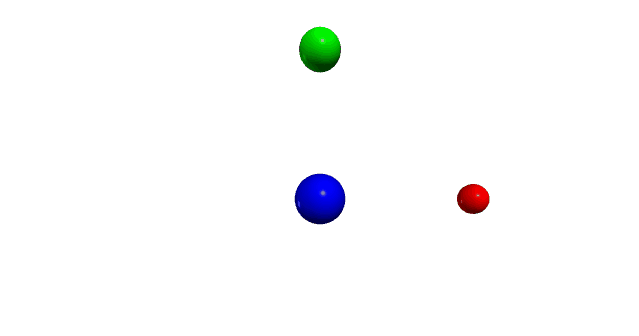

### What does it all do?
This code essentially allows us to utilize various objects from a certain class of object that will be influenced by the system in it of itself. To make it easier on myself I decided to use an object class and a list format while putting it under a for loop so that it can account for all three planets without having to put much code into it. This allows me to create a while loop for the Vpython module and then put it under a for loop in order to easily calculate both outcomes for the orbits. I wish to expand upon this in the future but as of now I think it works just fine.

### More Simulations, More!
While this one simulation is a great indication of how a three body system truly works, I believe there are various systems that can be utilized and show a proper three body and also show off the various types of it!

Here is a great example of that!

In [ ]:
from vpython import *
scene = canvas(title="Better Comet Simulation")
canvas(background=color.white)

object = []  # The object class list for the objects in orbit
object.append(Object(name="Blue Star", mass=1e28, position=vector(0, 0, 7e10), velocity=vector(2e3, 2e3, 0), radius=5e9,
                     color=color.blue))
object.append(
    Object(name="Comet", mass=1e20, position=vector(5e10, 0, 0), velocity=vector(7e2, 3e2, 4e2), radius=5e7,
           color=color.red))
object.append(
    Object(name="Green Star", mass=1e28, position=vector(0, 5e9, 0),
           velocity=vector(0, -3e2, 0), radius=5e9, color=color.green))

dt = 30000  # How fast the simulation is playing
def simulation():
    while True:  # The loop that Vpython uses in order to do the simulation
        rate(200)
        for i in range(len(object)):  # This calls all the objects that are in the orbit list
            total_force = vector(0, 0, 0)
            for j in range(len(object)):  # This creates a new call I can utilize
                if i != j:  # If the object is not itself, then it will be used for gravity calculations
                    r = object[j].pos - object[i].pos
                    force = G * object[i].mass * object[j].mass * norm(r) / (mag2(r))  # Gravity Equation
                    total_force = total_force + force

            object[i].changepos(dt, total_force)
simulation()


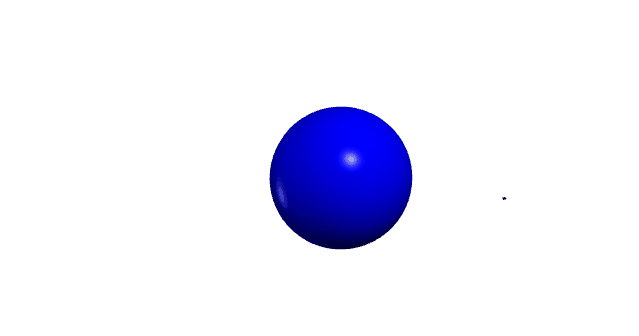

What you see above you is a great example of a 
### Stability in Mass
This is in essence a two body problem in a trenchcoat. This specific three body problem relies on at least one of objects to be significantly lower in mass than the others. This would result in the gravitational force coming from the smaller mass to be much more insignificant compared to the two bodies orbiting each other. This then results in a much more stable orbit pattern that you can easily recognize. This specific pseudo three body represents an orbit between two binary star system. It is also interesting how the orbit of the red system also follows a very strict pattern. Due to how it is influenced by the other two systems, once it is far enough away from both stars, instead of following the orbit of one star, it follows the center of mass of the system and allows itself to also be in a stable orbit.

Another thing of note from the red system. Due to its initial parameters and how it was treated, it essentially follows orbital path of a comet, where it would get really close to a star system before being jettisoned out into space, where it then slowly goes back to the center of mass of both stars and repeats the process. We'll see how the initial flight patterns effect a psuedo star system's continous orbit in a moment, but right now I want to focus on a larger system.

### Stability in distance
Though there is no truly stable orbit out there, there is however configurations that can give you long lasting stable orbits. One of them is having a orbit similar to the comet orbit seen from afar, however, the large celestial object would be significantly further, enough so to where it still follows an orbit path with the other two systems, but not enough to where the binary orbit is effected by the third distance object.

In [ ]:
from vpython import *
scene = canvas(title="Distant Three Body Problem")
canvas(background=color.white)

object = []  # The object class list for the objects in orbit
object.append(Object(name="Blue Star", mass=1e28, position=vector(0, 0, 7e10), velocity=vector(2e3, 2e3, 0), radius=5e9,
                     color=color.blue))
object.append(
    Object(name="Red star", mass=1e28, position=vector(3e11, 2e11, 0), velocity=vector(-9e2, 3e2, 1e3), radius=5e9,
           color=color.red))
object.append(
    Object(name="Green Star", mass=1e28, position=vector(1e9, 5e9, 0),
           velocity=vector(0, -3e2, 0), radius=5e9, color=color.green))

dt = 90000  # How fast the simulation is playing
def simulation():
    while True:  # The loop that Vpython uses in order to do the simulation
        rate(200)
        for i in range(len(object)):  # This calls all the objects that are in the orbit list
            total_force = vector(0, 0, 0)
            for j in range(len(object)):  # This creates a new call I can utilize
                if i != j:  # If the object is not itself, then it will be used for gravity calculations
                    r = object[j].pos - object[i].pos
                    force = G * object[i].mass * object[j].mass * norm(r) / (mag2(r))  # Gravity Equation
                    total_force = total_force + force

            object[i].changepos(dt, total_force)
simulation()

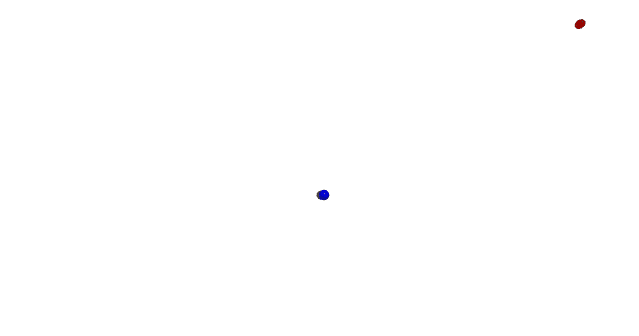

### Stability in Formation
This is arguably the hardest method to reaching a stable orbit, it is also the most stable non pseudo orbit that can be utilized. I do not have the time to calculate the proper equation for the simulation, so instead I will be relying on papers doing something similar. There is only one known stable solution to achieving a perfectly stable three body orbit that requires a lot of calculations to get precise, it is called the Figure-8 Orbit (Ramos 2019). It is the only orbit that remains in a near perfect revolution cycle in a closed system and lasts indefinitely. It is also, to be expected, to be highly improbable to form naturally, so simulations are the only real way we could achieve something like this. 

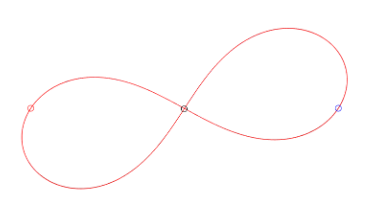

## Citations



Ramos Faustino. Stable Closed Orbits - Figure-8. *University of Edinburg*. https://www.maths.ed.ac.uk/~ateckent/vacation_reports/Report_Faustino.pdf